In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#import pickle
#pickle.dump(model,open("model_cardio.p","wb"))# write binary

Data cleaning and wrangling

In [3]:
df = pd.read_csv("/Users/josegabriel/Desktop/ironhack/projecto week 6/winequalityN.csv")
#df.head()

In [4]:
#df.isnull().sum()

In [5]:
df["fixed acidity"].fillna(df["fixed acidity"].median(), inplace= True)
df["volatile acidity"].fillna(df["volatile acidity"].median(), inplace= True)
df["citric acid"].fillna(df["citric acid"].median(), inplace= True)
df["residual sugar"].fillna(df["residual sugar"].median(), inplace= True)
df["chlorides"].fillna(df["chlorides"].median(), inplace= True)
df["pH"].fillna(df["pH"].median(), inplace= True)
df["sulphates"].fillna(df["sulphates"].median(), inplace= True)

In [6]:
df['best quality'] = [0 if x <= 3 else 1 if x <= 7 else 2 for x in df['quality']]
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [7]:
df.rename(columns={'fixed acidity': 'fixed_acidity'}, inplace=True)
df.rename(columns={'volatile acidity': 'volatile_acidity'}, inplace=True)
df.rename(columns={'citric acid': 'citric_acid'}, inplace=True)
df.rename(columns={'residual sugar': 'residual_sugar'}, inplace=True)
df.rename(columns={'fixed acidity': 'fixed_acidity'}, inplace=True)
df.rename(columns={'free sulfur dioxide': 'free_sulfur_dioxide'}, inplace=True)
df.rename(columns={'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)


In [8]:
df_1 = df.drop(columns =["type"])
#df_1.head()

In [9]:
df_1.duplicated().sum()

1170

In [10]:
df_2 = df_1.drop_duplicates()
df_2.reset_index()

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,best quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5322,6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
5323,6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
5324,6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6,1
5325,6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


Correlation between variables

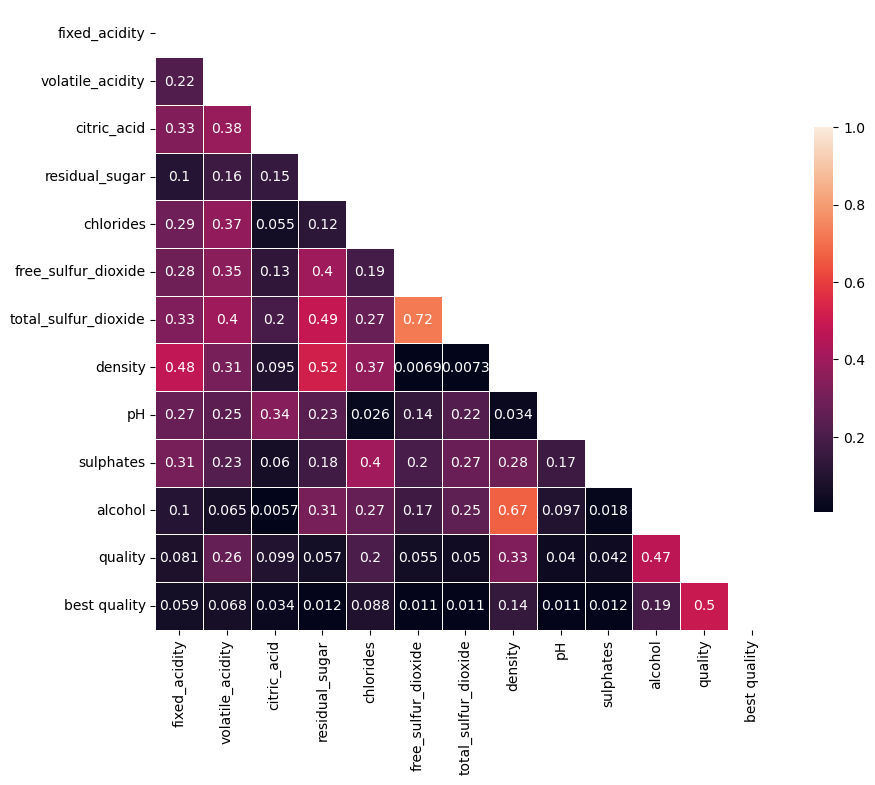

In [11]:
corr=np.abs(df_2.corr())
#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.show()

Feature Engenineering

In [12]:
features = df_2.drop(columns = ["quality","best quality"])
target = df_2["best quality"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [14]:
#X_train.head()

In [15]:
#y_train.head()

In [16]:
#Normalize the train and test model
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [17]:
#Drop the features with low correlation with the target and high independent correlation
X_train_reduced = X_train_norm.drop(columns = ["total_sulfur_dioxide","free_sulfur_dioxide","pH"])
X_test_reduced = X_test_norm.drop(columns = ["total_sulfur_dioxide", "free_sulfur_dioxide","pH"])

Testing Logistic Regression

In [18]:
model = LogisticRegression()
model.fit(X_train_reduced, y_train)

LogisticRegression()

In [19]:
pred = model.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", np.sqrt(mean_squared_error(pred, y_test, squared=False)))
print("R2 score", model.score(X_test_reduced, y_test))

MAE 0.029080675422138838
RMSE 0.4129534723729141
R2 score 0.9709193245778611


In [20]:
model.score(X_train_reduced,y_train)

0.9640929359305327

In [21]:
ada_reg = AdaBoostClassifier(LogisticRegression(),
                            n_estimators=100)

In [22]:
ada_reg.fit(X_train_reduced, y_train)

AdaBoostClassifier(estimator=LogisticRegression(), n_estimators=100)

In [23]:
pred1 = ada_reg.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred1, y_test))
print("RMSE", np.sqrt(mean_squared_error(pred1, y_test, squared=False)))
print("R2 score", ada_reg.score(X_test_reduced, y_test))

MAE 0.029080675422138838
RMSE 0.4129534723729141
R2 score 0.9709193245778611


In [24]:
ada_reg.score(X_train_reduced,y_train)

0.9640929359305327

In [25]:
bagging_reg = BaggingClassifier(LogisticRegression(),
                               n_estimators=100,
                               max_samples = 1000)

In [26]:
bagging_reg.fit(X_train_reduced, y_train)

BaggingClassifier(estimator=LogisticRegression(), max_samples=1000,
                  n_estimators=100)

In [27]:
pred2 = bagging_reg.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred2, y_test))
print("RMSE", np.sqrt(mean_squared_error(pred2, y_test, squared=False)))
print("R2 score", bagging_reg.score(X_test_reduced, y_test))

MAE 0.029080675422138838
RMSE 0.4129534723729141
R2 score 0.9709193245778611


Testing Decision Tree

In [28]:
tree = DecisionTreeClassifier(max_depth=10)

In [29]:
tree.fit(X_train_reduced, y_train)

DecisionTreeClassifier(max_depth=10)

In [30]:
pred3 = tree.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred3, y_test))
print("RMSE", np.sqrt(mean_squared_error(pred3, y_test, squared=False)))
print("R2 score", tree.score(X_test_reduced, y_test))

MAE 0.04784240150093809
RMSE 0.4676847865510311
R2 score 0.9521575984990619


In [31]:
ada_reg1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),
                            n_estimators=100)

In [32]:
ada_reg1.fit(X_train_reduced, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=100)

In [33]:
pred4 = ada_reg1.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred4, y_test))
print("RMSE", np.sqrt(mean_squared_error(pred4, y_test, squared=False)))
print("R2 score", ada_reg1.score(X_test_reduced, y_test))

MAE 0.029080675422138838
RMSE 0.4129534723729141
R2 score 0.9709193245778611


In [34]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 500, stop = 3000, num = 10)],
        "estimator__max_depth":[int(x) for x in np.linspace(10, 110, num = 11)]}

In [35]:
ada_reg10 = AdaBoostClassifier(DecisionTreeClassifier())

model1 = RandomizedSearchCV(estimator = ada_reg10, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [36]:
model1.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [10, 20, 30, 40,
                                                                 50, 60, 70, 80,
                                                                 90, 100, 110],
                                        'estimator__max_leaf_nodes': [500, 777,
                                                                      1055,
                                                                      1333,
                                                                      1611,
                                                                      1888,
                                                                      2166,
                                                                      2444,
                                                                      2722,
                                                                      3000],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [37]:
model1.best_params_

{'n_estimators': 1200,
 'estimator__max_leaf_nodes': 777,
 'estimator__max_depth': 10}

In [38]:
best_model = model1.best_estimator_

In [39]:
pred20 = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred20, y_test))
print("RMSE", np.sqrt(mean_squared_error(pred20, y_test, squared=False)))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 0.0300187617260788
RMSE 0.41624419843366467
R2 score 0.9699812382739212


In [40]:
bagging_reg.score(X_train_reduced,y_train)

0.9640929359305327

In [41]:
bagging_reg1 = BaggingClassifier(DecisionTreeClassifier(max_depth=10),
                               n_estimators=100,
                               max_samples = 1000)

In [42]:
bagging_reg1.fit(X_train_reduced, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                  max_samples=1000, n_estimators=100)

In [43]:
pred5 = bagging_reg1.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred5, y_test))
print("RMSE", np.sqrt(mean_squared_error(pred5, y_test, squared=False)))
print("R2 score", bagging_reg1.score(X_test_reduced, y_test))

MAE 0.029080675422138838
RMSE 0.4129534723729141
R2 score 0.9709193245778611


In [44]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 500, stop = 3000, num = 10)],
        "estimator__max_depth":[int(x) for x in np.linspace(10, 110, num = 11)]}

In [45]:
model1 = RandomizedSearchCV(estimator = ada_reg1, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [46]:
model1.fit(X_train_reduced,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                                                n_estimators=100),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [10, 20, 30, 40,
                                                                 50, 60, 70, 80,
                                                                 90, 100, 110],
                                        'estimator__max_leaf_nodes': [500, 777,
                                                                      1055,
                                                                      1333,
                                                                      1611,
                                                                      1888,
                                                                      2166,
                                                                      2444,
                                                                      2722,
                                                                      3000],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [47]:
model1.best_params_

{'n_estimators': 200,
 'estimator__max_leaf_nodes': 1611,
 'estimator__max_depth': 20}

In [48]:
best_model = model1.best_estimator_

In [49]:
pred20 = best_model.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred20, y_test))
print("RMSE", np.sqrt(mean_squared_error(pred20, y_test, squared=False)))
print("R2 score", best_model.score(X_test_reduced, y_test))

MAE 0.04127579737335835
RMSE 0.45073768306250617
R2 score 0.9587242026266416


In [50]:
best_model.score(X_train_reduced,y_train)

1.0

Testing KNN

In [51]:
knn = KNeighborsClassifier(n_neighbors=10)

In [52]:
knn.fit(X_train_reduced, y_train)

KNeighborsClassifier(n_neighbors=10)

In [53]:
knn.score(X_train_reduced, y_train)

0.9643276226237972

In [54]:
knn.score(X_test_reduced, y_test)

0.9699812382739212

In [55]:
pred6 = knn.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred6, y_test))
print("RMSE", np.sqrt(mean_squared_error(pred6, y_test, squared=False)))
print("R2 score", knn.score(X_test_reduced, y_test))

MAE 0.0300187617260788
RMSE 0.41624419843366467
R2 score 0.9699812382739212


In [56]:
bagging_reg2 = BaggingClassifier(KNeighborsClassifier(n_neighbors=10),
                               n_estimators=100,
                               max_samples = 1000)

In [57]:
bagging_reg2.fit(X_train_reduced, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=10),
                  max_samples=1000, n_estimators=100)

In [58]:
pred7 = bagging_reg2.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred7, y_test))
print("RMSE", np.sqrt(mean_squared_error(pred7, y_test, squared=False)))
print("R2 score", bagging_reg2.score(X_test_reduced, y_test))

MAE 0.029080675422138838
RMSE 0.4129534723729141
R2 score 0.9709193245778611


Linear Regression

In [59]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reduced, y_train)

LinearRegression()

In [60]:
pred8 = lin_reg.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred8, y_test))
print("RMSE", mean_squared_error(pred8, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_reduced, y_test))

MAE 0.06139102154540963
RMSE 0.16739002551896615
R2 score 0.023461531529833213


In [61]:
lin_reg.score(X_train_reduced, y_train)

0.04659232127157886

Testing Random Forest

In [62]:
forest1 = RandomForestClassifier(n_estimators=100,
                             max_depth=20)

In [63]:
forest1.fit(X_train_reduced, y_train)

RandomForestClassifier(max_depth=20)

In [64]:
pred9 = forest1.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred9, y_test))
print("RMSE", np.sqrt(mean_squared_error(pred9, y_test, squared=False)))
print("R2 score", forest1.score(X_test_reduced, y_test))

MAE 0.029080675422138838
RMSE 0.4129534723729141
R2 score 0.9709193245778611


In [65]:
ada_reg2 = AdaBoostClassifier(RandomForestClassifier(max_depth=20),
                            n_estimators=100)

In [66]:
ada_reg2.fit(X_train_reduced, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=20),
                   n_estimators=100)

In [67]:
pred10 = ada_reg2.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred10, y_test))
print("RMSE", np.sqrt(mean_squared_error(pred10, y_test, squared=False)))
print("R2 score", ada_reg2.score(X_test_reduced, y_test))

MAE 0.029080675422138838
RMSE 0.4129534723729141
R2 score 0.9709193245778611


In [68]:
ada_reg2.score(X_train_reduced, y_train)

1.0

In [69]:
bagging_reg3 = BaggingClassifier(RandomForestClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [70]:
bagging_reg3.fit(X_train_reduced, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100)

In [71]:
pred11 = bagging_reg3.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred11, y_test))
print("RMSE", np.sqrt(mean_squared_error(pred11, y_test, squared=False)))
print("R2 score", bagging_reg3.score(X_test_reduced, y_test))

MAE 0.029080675422138838
RMSE 0.4129534723729141
R2 score 0.9709193245778611


Testing Gradient Boosting

In [72]:
gb_reg = GradientBoostingClassifier(max_depth=20,
                                   n_estimators=100)

In [73]:
gb_reg.fit(X_train_reduced, y_train)

GradientBoostingClassifier(max_depth=20)

In [74]:
pred12 = gb_reg.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred12, y_test))
print("RMSE", np.sqrt(mean_squared_error(pred12, y_test, squared=False)))
print("R2 score", gb_reg.score(X_test_reduced, y_test))

MAE 0.0450281425891182
RMSE 0.46064992858668957
R2 score 0.9549718574108818


In [75]:
gb_reg.score(X_train_reduced, y_train)

1.0